In [1]:
%%capture
!pip3 install tensorflow
!pip3 install tensorflow-datasets

In [2]:
from config import *
from image_sparse_warp import *
from util import *

In [3]:
# Load dataset 
ds = tfds.load('duke_ultrasound', data_dir='gs://tfds-data/datasets')
test_dataset = ds['MARK'].map(process) # Splits: MARK, TRAIN, VALIDATION, TEST, A, B
test_iter = iter(test_dataset)
ele = next(test_iter)

In [ ]:
# Choose next data point
ele = next(test_iter)

In [4]:
# Precompute step
empty_res_image, points_xy, val_rtheta, val_weights = image_sparse_warp_precompute(ele['dtce'], ele, ele['dtce'].shape[0], ele['dtce'].shape[1])

In [5]:
# Dynamic step
t1 = time.perf_counter()
res = image_sparse_warp(ele['dtce'], empty_res_image, ele, points_xy, val_rtheta, val_weights)
t2 = time.perf_counter() - t1
# print(t2)

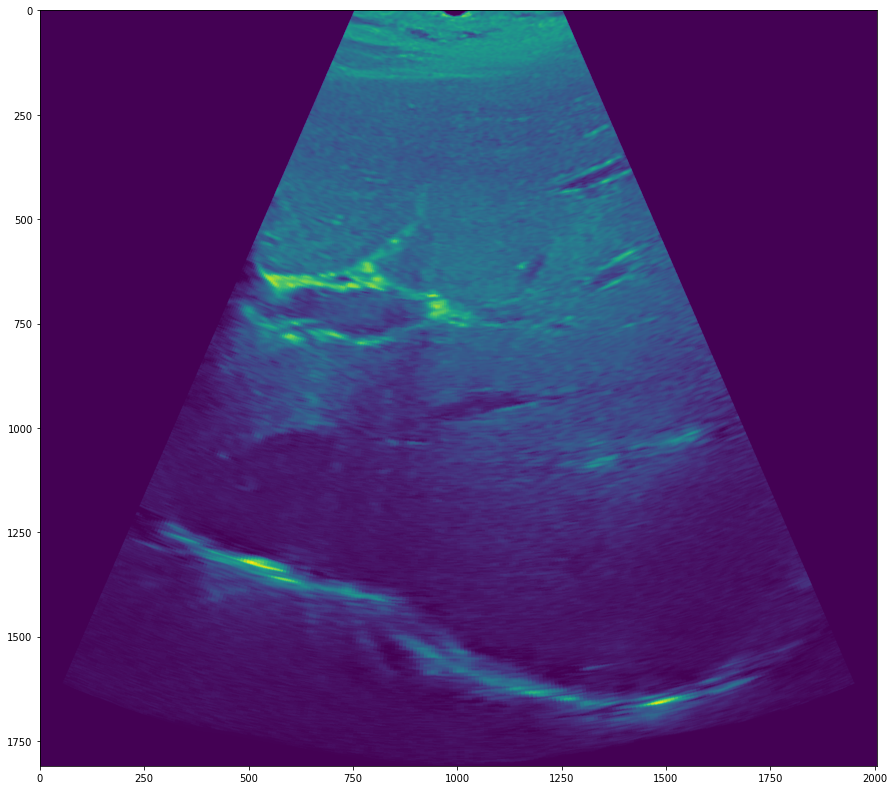

In [6]:
# Plot
plt.figure(figsize=(15,15))
plt.imshow(res)